In [1]:
# Importing necessary libraries for data manipulation, visualization, and clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler
import seaborn as sns

In [2]:
# Setting the theme for seaborn plots
sns.set_theme(style="whitegrid")

### Data Loading

In [4]:
data = pd.read_csv('Mall_Customers.csv')
# Display the first few rows of the dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Preprocessing


In [5]:
# Remove irrelevant columns from the dataset
data = data.drop(['CustomerID', 'Gender'], axis=1)

In [6]:
# Fill missing values with the forward fill method
data.fillna(method='ffill', inplace=True)

C:\Users\tariq\AppData\Local\Temp\ipykernel_8668\3712684402.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [7]:
# Standardize the data to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# Normalize the data to fit a Gaussian distribution
data_normalized = normalize(data_scaled)
# Convert the normalized data back into a DataFrame
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)
# Display the first few rows of the preprocessed dataset
data_normalized.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-0.622173,-0.759499,-0.189897
1,-0.518894,-0.704396,0.484330
2,-0.488556,-0.614244,-0.619691
3,-0.495541,-0.740949,0.453247
4,-0.313049,-0.923896,-0.220036


### Data Exploration


count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64


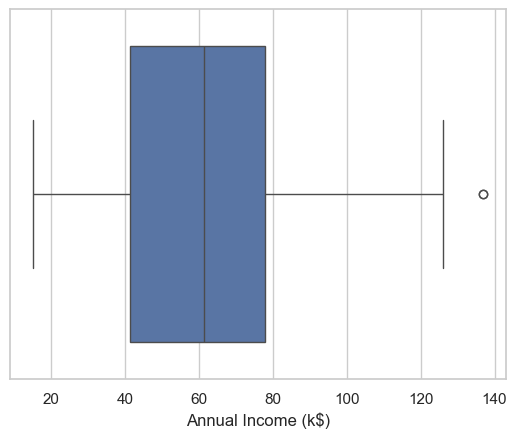

In [8]:
# Visualize the distribution of 'Annual Income (k$)' using a boxplot
sns.boxplot(x=data["Annual Income (k$)"])
# Display descriptive statistics for 'Annual Income (k$)'
print(data["Annual Income (k$)"].describe())

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64


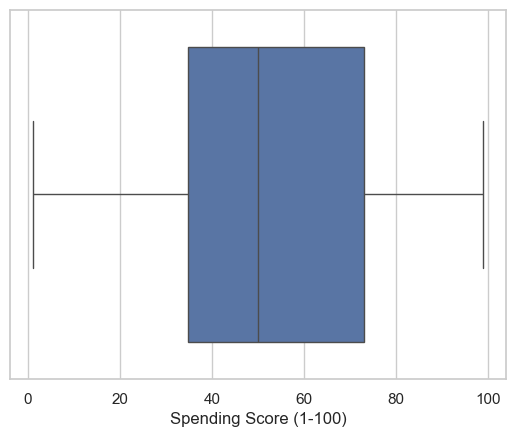

In [9]:
# Visualize the distribution of 'Spending Score (1-100)' using a boxplot
sns.boxplot(x=data["Spending Score (1-100)"])
# Display descriptive statistics for 'Spending Score (1-100)'
print(data["Spending Score (1-100)"].describe())

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64


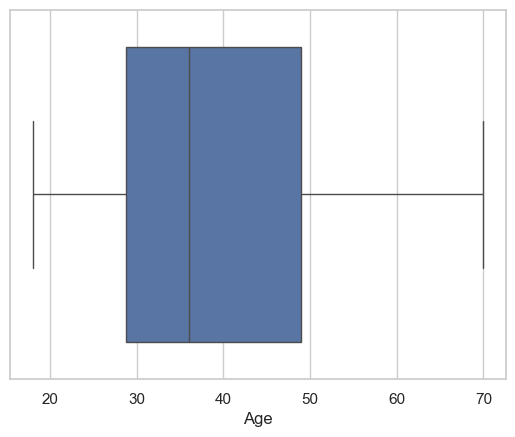

In [10]:
# Visualize the distribution of 'Age' using a boxplot
sns.boxplot(x=data["Age"])
# Display descriptive statistics for 'Age'
print(data["Age"].describe())

### Building the Clustering Model


In [11]:
# Initialize the OPTICS clustering model with specified parameters
optics_model = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.05)
# Fit the OPTICS model to the normalized dataset
optics_model.fit(data_normalized)

OPTICS(min_cluster_size=0.05, min_samples=10)

### Storing the Clustering Results


In [13]:

# Generate labels using the DBSCAN method with eps=0.5
labels_eps_05 = cluster_optics_dbscan(reachability=optics_model.reachability_,
                                      core_distances=optics_model.core_distances_,
                                      ordering=optics_model.ordering_, eps=0.5)
# Generate labels using the DBSCAN method with eps=2.0
labels_eps_2 = cluster_optics_dbscan(reachability=optics_model.reachability_,
                                     core_distances=optics_model.core_distances_,
                                     ordering=optics_model.ordering_, eps=2)

# Print the generated labels for inspection
print(optics_model.labels_)  # Labels generated by OPTICS
print(labels_eps_05)         # Labels for DBSCAN with eps=0.5
print(labels_eps_2)          # Labels for DBSCAN with eps=2.0


[-1  0 -1  0 -1  0 -1  0  3  0  3  0  3  0 -1  0 -1  0  3  0 -1  0 -1  0
  3  0 -1  0 -1  0  3  0  3  0  3  0 -1  0 -1  0 -1  0  3  0  3  0 -1  0
 -1 -1 -1  0  0  4 -1  3 -1  4  0 -1  4 -1  4  4  4 -1 -1  4 -1 -1  4  3
  4  4  4  1  4 -1  1 -1  4  0  4  3  1  4  4  1  0  4  4  1  4 -1  1  1
  4  1 -1  1  1  4  4  1  4  1  4  4  4  4  4  1 -1  1  1  1  4 -1  4 -1
  1 -1  5  5 -1  5  2  5 -1  5  2  5 -1  5 -1  5  2  5 -1  5 -1  5 -1  5
 -1  5 -1  5 -1  5  2  5  2  5  2  5 -1  5 -1  5 -1  5 -1  5  2  5 -1  5
 -1  5  2  5 -1  5  2  5  2  5  2  5 -1  5  2  5 -1  5 -1  5 -1  5 -1  5
 -1  5 -1  5 -1  5 -1  5]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 

### Visualizing the Clustering Results


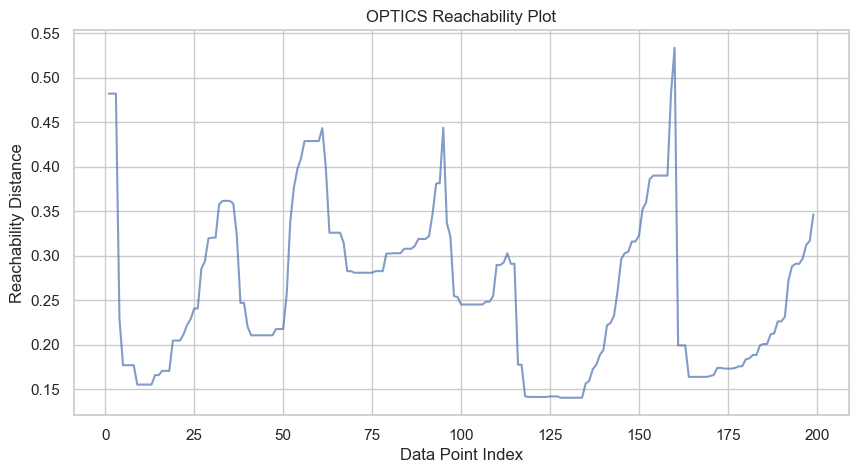

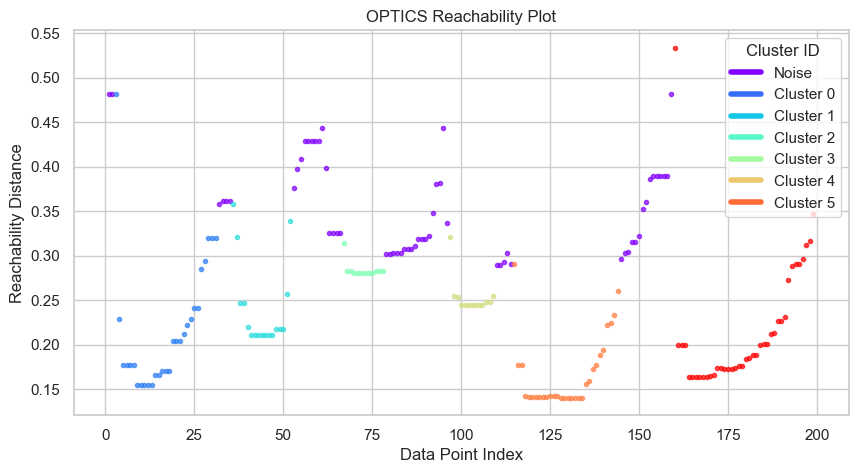

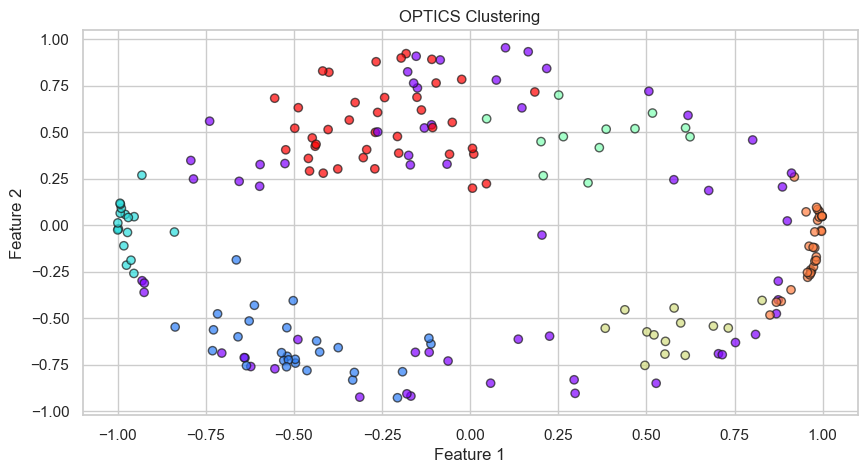

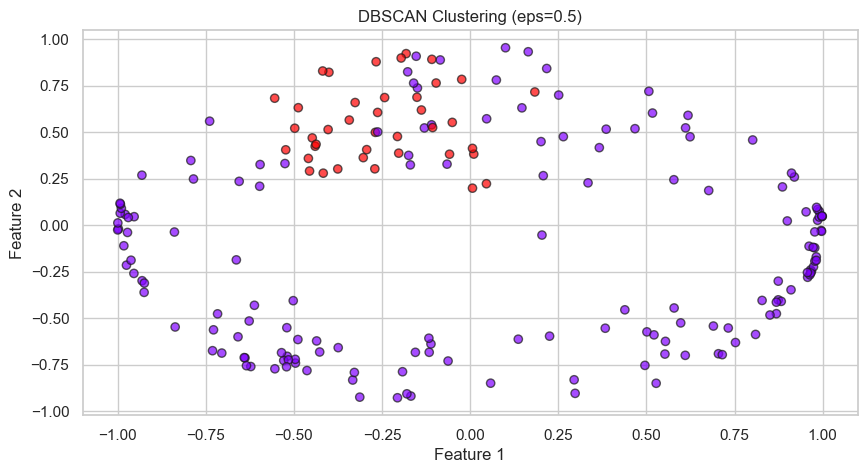

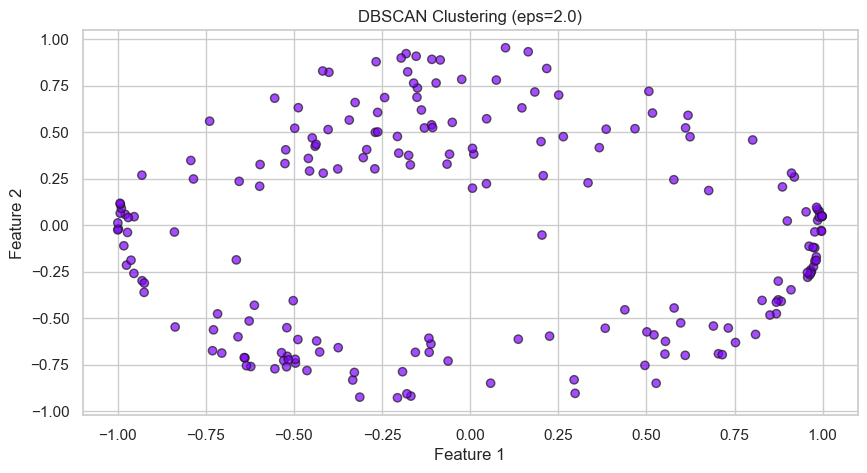

In [22]:
reachability = optics_model.reachability_[optics_model.ordering_]
labels = optics_model.labels_[optics_model.ordering_]

# Simple Reachability Plot
plt.figure(figsize=(10, 5))
plt.plot(reachability, alpha=0.7)
plt.title('OPTICS Reachability Plot')
plt.xlabel('Data Point Index')
plt.ylabel('Reachability Distance')
plt.show()
plt.figure(figsize=(10, 5))

# Create a unique set of labels to iterate over
unique_labels = np.unique(labels)

# Generate a color map for each unique label
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    # Find indices where the label matches
    indices = np.where(labels == label)
    # Plot reachability values for those indices in the assigned color
    plt.plot(indices[0], reachability[indices], '.', color=color, alpha=0.7)

# Adding a custom legend
# Create custom labels for the legend (assuming -1 is noise)
custom_lines = [plt.Line2D([0], [0], color=plt.cm.rainbow(i / len(unique_labels)), lw=4) for i in range(len(unique_labels))]
custom_labels = ['Cluster {}'.format(i) if i != -1 else 'Noise' for i in unique_labels]
plt.legend(custom_lines, custom_labels, loc='upper right', title='Cluster ID')

plt.title('OPTICS Reachability Plot')
plt.xlabel('Data Point Index')
plt.ylabel('Reachability Distance')
plt.show()

# OPTICS Clustering Visualization
plt.figure(figsize=(10, 5))
plt.scatter(data_normalized.iloc[:, 0], data_normalized.iloc[:, 1], c=optics_model.labels_, cmap='rainbow', alpha=0.7, edgecolor='k')
plt.title('OPTICS Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# DBSCAN Clustering Visualization with eps=0.5
plt.figure(figsize=(10, 5))
plt.scatter(data_normalized.iloc[:, 0], data_normalized.iloc[:, 1], c=labels_eps_05, cmap='rainbow', alpha=0.7, edgecolor='k')
plt.title('DBSCAN Clustering (eps=0.5)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# DBSCAN Clustering Visualization with eps=2.0
plt.figure(figsize=(10, 5))
plt.scatter(data_normalized.iloc[:, 0], data_normalized.iloc[:, 1], c=labels_eps_2, cmap='rainbow', alpha=0.7, edgecolor='k')
plt.title('DBSCAN Clustering (eps=2.0)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()